In [4]:
# IFT 3700 - Devoir 1
- OLIVIER DOMINIQUE ( )
- HANIFA MALLEK (P1005515)
- VIVIANNE NGUYEN DONG (P0922428)
- MAUDE SABOURIN (P1141140)



SyntaxError: invalid syntax (<ipython-input-4-3d0d02264fd5>, line 2)

## Rappel - Notion de distance
Même si la distance euclidienne est une des distances les plus utilisées pour les algorithmes, elle devient moins intéressante dans certaines situations clées. Plusieurs articles parlent, entre autres, d’un problème avec les grandes dimensions (connue comme la ‘curse of dimensionanility’). Ce projet proposera donc d’adapter la notion de distance à une notion de similarité.

Rappelons premièrement les propriétés d’une distance à proprement dit :
Présence de l’inégalité du triangle
Non-négativité
Symétrie
Distinguabilité


## Description - Notre notion de similarité
La performance des systèmes pour reconnaître l’écriture repose souvent sur deux facteurs : l’extraction des composantes à partir de l’image (provenant de la base de données MNIST) et le classement de celle-ci par la suite. Dans le cadre de ce cours, plusieurs techniques ont été introduites. Entre autres, il a été vu qu’il est possible d’utiliser PCA afin de réduire les dimensions de l’image d’abord, puis appliquer KNN avec la notion de distance euclidienne pour la classification de l’image par la suite. Lors de ce travail, il est demandé de proposer une nouvelle notion de similarité originale et de comparer l’efficacité de celle-ci avec la distance euclidienne.

Tout d’abord, nous pensions pouvoir utiliser des distances connues (similarité du cosinus utilisé avec JPEG, distance des tangentes, ou encore les gradients). Mais après quelques tests, les résultats ne furent pas très fructueux. Avec le peu d’expérience de l’équipe, la modification de ces algorithmes n’était pas dans la sphère du faisable. 

Ensuite, nous avons voulu utiliser les concepts de base des chiffres arabes : soit pouvoir reconnaître les courbes et les lignes. En effet, chaque chiffre se définit en fonction d’un certain nombre de courbes, de cercles et/ou de lignes droites. L’idée semblait intéressante et simple, mais nos faibles connaissances en mathématique nous ont encore une fois mis des barrières. Nous avons essayé de modéliser une façon de reconnaître les différents éléments des chiffres (prendre des points et trouver l’équation de deuxième degré, comparer les pentes à un tableau de pente pré-définie, faire une projection orthogonale dans un autre espace, etc.). Bref, nous semblions nous éloigner du but du cours sans être capable de concrètement produire quelque chose. Une autre idée a été d’utiliser les statistiques des coordonnées les plus représentées pour chaque chiffre. Ainsi, nous commençons par normaliser les chiffres pour les mettre en 0 et 1 plutôt qu’une valeur entre 0 et 255. Ensuite, nous mettons dans dix matrices différentes la somme de toutes les cases des matrices pour chaque chiffre.

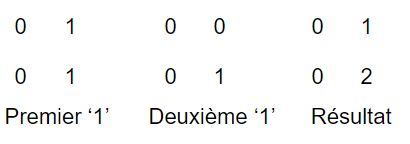

Cette façon simple nous permet de voir où se trouve les points les plus pertinents afin de reconnaître un chiffre en particulier. Par la suite, une fois que nous avons une matrice globale pour chaque chiffre, nous la divisons par la moyenne pour normaliser les chiffres qu’elle contient. On remarque par exemple que les coordonnées présentes presque partout ont une valeur d’environ 1000 (10^3) alors que les valeurs extrêmes ou rares auront une petite valeur.

Ensuite, lorsqu’un nouveau chiffre arrive dans le système, on compare le positionnement de ses 1 et 0 avec notre matrice. Un poids est attribué en fonction de la largeur du nombre. Ainsi, une valeur plus grande sera considéré comme un discriminant important pour décider si la nouvelle image est un nombre en particulier. De plus, nous considérons que notre équipe a une connaissance de base en écriture de nombres de façon calligraphique. Donc, nous avons de façon manuelle noter des coordonnées plus importantes que d’autres pour certains chiffres. Afin de tenir compte de la translation dans notre distance, nous appliquons la logique suivante :

1. Copier la matrice M en matrice M’
2. Pour tout i, Si M’[i][i] ne contient que des 0, supprimer la ligne et la colonne
3. Ramener ensuite la matrice M’ dans la dimension initiale M

En définitive, si on a fait une translation de notre chiffre vers la droite (par exemple), on va pouvoir se débarrasser de la portion vide à gauche. Puis, on va ramener le chiffre au centre lorsque l’on ramène la nouvelle matrice dans la dimension initiale. 

Tout ceci n’étant pas très concluant, nous avons opté pour une notion de similarité qui implique un traitement préalable des données. Ce traitement transforme les données d’abord puis utilise quand même la distance euclidienne pour les algorithmes suivants : k-médoïde, partition binaire, PCoA, Isomap et KNN. Dans un premier temps, nous allons expliquer en détail comment la transformation des données se fait. Puis, nous allons analyser la différence en termes de performance des différents algorithmes précisés lorsqu’on utilise seulement la notion euclidienne versus lorsqu’on utilise la distance euclidienne sur les données transformées.

Tel que mentionné plus haut, notre notion de similarité implique d’abord une transformation des données. Pour ce faire, nous allons utiliser la notion de traitement par centroïde. Dans un premier temps, nous allons chercher toutes les coordonnées (xi, yi) des pixels noirs de notre image. Nous faisons ensuite une moyenne sur ces coordonnées selon l’équation suivante :

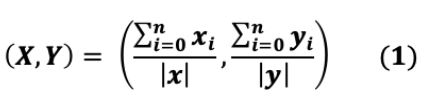

(X,Y) sont les coordonnées du centroïde de notre image de départ.

La deuxième étape consiste quant à elle à subdiviser ensuite l’image en n parties distinctes (prenons n=4 par exemple). On considère chacune des 4 sous-parties comme des images différentes maintenant et on réapplique la formule (1) sur chacune des sous-images afin d’obtenir leur centroïde. On obtient ainsi 4 paires de coordonnées : (X1, Y1), (X2, Y2), (X3, Y3) et (X4, Y4).

 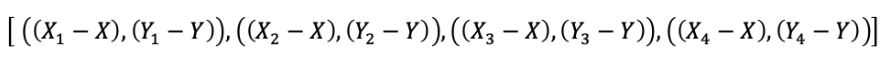

Finalement, la dernière étape implique la création d’un vecteur de n composantes afin de garder la distance entre chaque nouvelle paire de coordonnées obtenue pour les sous-images par rapport à la paire de coordonnées de l’image de départ.

L’avantage de procéder ainsi avec des sous-sections est que cela permet d’éliminer les variations de pixels au niveau de l’image et ainsi de garder une forme plus globale des chiffres. De plus, faire la différence entre les coordonnées des n centroïdes (des sous-images) et les coordonnées du centroïde de l’image initial permet d’éliminer les effets de translation étant donné qu’on ne considère toujours que les pixels noirs.


## Initialisations
### Importation des modules

In [11]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import Isomap
from pyclustering.cluster.kmedoids import kmedoids
#from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
import scipy.fftpack as fftpack
import scipy

import matplotlib.pyplot as plt
import matplotlib.image as img 
import time
%matplotlib inline

ImportError: No module named pyclustering.cluster.kmedoids

### Fonction Utile

In [5]:
def printImage(x, width=28, height=28):
    plt.imshow(x.reshape((height, width)), cmap='gray')


## Définition des listes de données MNIST


In [6]:
f = lambda x : 1 if x > 128 else 0
normalize = np.vectorize(f)

mnist_train = np.loadtxt("mnist_train.csv", delimiter=",", skiprows=1)
mnist_train[:, 1:] = normalize(mnist_train[:,1:])

mnist_test = np.loadtxt("mnist_test.csv", delimiter=",", skiprows=1)
mnist_test[:, 1:] = normalize(mnist_test[:,1:])



IOError: mnist_train.csv not found.

In [7]:
n_train_data = mnist_train.shape[0]

n_test_data = mnist_test.shape[0]

ndim = mnist_train.shape[1] - 1
img_dim = int(ndim ** (1./2.))

NameError: name 'mnist_train' is not defined

## Traitement par centroïde

Pour ce traitement, on commence par calculer le centroïde de l'image en calculant la moyenne des coordonnées (x,y) des pixels noirs de l'image. Ensuite, on subdivise l'image en n parties distinctes. Cela donne $2^n$ sous-images. Pour chacune des sous-images, on calcule son centroïde de la même manière qu'on le fait pour l'image complète. Ensuite, on garde dans un vecteur les distances entre les centroïde d'une sous-image avec le centroïde de l'image complète. Ceci nous donne un vecteur de dimension $2^n * 2$. On peut donc voir que le 'n', dans ce modèle, est un hyperparamètre.

L'idée derrière cette méthode est que si on regarde pixel par pixel deux images d'un même chiffre, on obtient beaucoup de différence. En prenant des sous-sections plus larges, on élimine les petites variations de pixels et on garde une forme plus globale. 

Dans l'algorithme, on applique aussi deux transformations pour essayer d'uniformiser les données. D'abord, on recentre les données par rapport au centroïde. Ensuite, on fait une transformation d'échelle pour que les données aient à peu près toute la même taille. La transformation d'échelle prend les données les plus éloignées en x et en y et applique la transformation qui amène ces points aux coordonnées 14 ou -14 dans les deux directions.

Par la suite, la distance euclidienne sera utilisée pour comparer les nouveaux vecteurs obtenus.

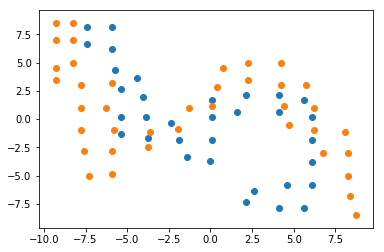

In [23]:
# Retourne le centroïde des points noirs d'une image en coordonnées (vertical, horizontal)
def get_center(x):
    dx, dy = x.shape[0], x.shape[1]
    vect = np.zeros((dx*dy, 2))
    k = 0
    result = np.zeros((2))
    var = 0
    for i in range(dy):
        for j in range(dx):
            if x[i, j] == 1:
                result += np.array([i, j])
                k += 1
    # On retourne le centroïde, ou (-1, -1) si l'image est vide
    return result / k if k > 0 else np.zeros(2) - 1


# Calcule la distance des centroïdes des différentes 
# sous-sections de l'image avec le centroïde de l'image totale, 
# le nombre de séparation doit être un diviseur de 28
def grid(x, n=2):
    ndim = 28
    img = x.reshape((28, 28))
    delta = ndim // n # Saut de coordonnées entre les sous-parties
    center = get_center(img) # Centre de l'image
    # Initialisation des centroïdes des sous-parties
    centroids = np.zeros((n, n, 2)) 
    for i in range(n):
        for j in range(n):
            i_square = i*delta # origine verticale du carré 
            j_square = j*delta # origine horizontale du carré
            # centroïde de l'image
            cent = get_center(img[i_square:(i+1)*delta, j_square:(j+1)*delta]) 
            
            # Cas où le carré est vide
            if cent[0] == -1:
                """on appplique une pénalité de -15 (hors de l'image) si le carré est vide.
                     Pour que la pénalité soit relative à la position du carré (afin que la 
                     pénalité soit consistante quand on calculera la distance entre deux image)
                     on applique la pénalité relativement à la position du carré"""
                centroids[i, j] = np.zeros((2)) - 15 * np.array([n - i, n - j])
            
            # Cas où le centroïde existe
            else:
                 
                centroids[i, j] = np.array([i_square, j_square]) + cent - center
    return centroids.reshape((n**2*2))
''' 
###########################################################################################
Cette version de l'algo donne des résultats assez bizarres avec ISOMAP. Nous avons
donc décidé de l'enlever pour l'instant, en espérant pouvoir comprendre les problématiques
d'ici la fin de la session ou dans le prochain devoir
##########################################################################################
    # Résultat des centroïdes transformés en un vecteur de n**2 données bidimensionelles
    a_centroids = centroids.reshape((n**2, 2))
    # Calcul des coordonées extrêmes
    max_v = np.max(np.abs(a_centroids[a_centroids[:,0] > -15, 0]))
    
    max_h = np.max(np.abs(a_centroids[a_centroids[:,1] > -15, 1]))
    max_v_ratio = 1.
    max_h_ratio = 1.
    #le centroïde doit être différent de (0, 0) pour appliquer un changement d'échelle
    if max_v > 0:
        max_v_ratio = 14 / max_v
        
    if max_h > 0:
        max_h_ratio = 14 / max_h
 
    a_centroids *= np.array([max_v_ratio, max_h_ratio])
    return a_centroids.reshape((n**2*2)) # On transforme en un vecteur    
''' 


# Applique grid à une liste de données
def to_grids(x, n_sub=2):
    
    n_data = x.shape[0]
    
    n_sub_dim = n_sub**2*2
    result = np.zeros((n_data, n_sub_dim))
    for i in range(n_data):
        result[i] = grid(x[i], n_sub) # les données sont transformer en vecteur
        
    return result



mnist_class = [mnist_train[mnist_train[:,0] == i, 1:] for i in range(10)]

#mnist_class_mean = np.array([np.mean(datas, axis=0) for datas in mnist_class])

# Test pour le chiffre 5
test1 = grid(mnist_class[5][10], 12)
test2 = grid(mnist_class[5][0], 12)

# On élimine les données hors de l'écran
test1 = test1[np.abs(test1) < 15]
test2 = test2[np.abs(test2) < 15 ]
 
plt.scatter(test1.reshape(test1.shape[0]//2, 2)[:, 0], test1.reshape(test1.shape[0]//2, 2)[:, 1])
plt.scatter(test2.reshape(test2.shape[0]//2, 2)[:, 0], test2.reshape(test2.shape[0]//2, 2)[:, 1])
plt.show()


On peut voir qu'on obtient une forme générale similaire pour les deux valeurs de 5

## Algorithmes

Pour commencer nous appliquons la transformation aux données. Dans ce cas là nous avons chosis un exemplaire de 6000 données d'entraînement. Le nombre de subdivisions est fixé à 14.

In [9]:
# Transformation des données MNIST (peut prendre un certain temps)

# Traitment en série de centroïde
# n_sub_div : Nombre de subdivisions de l'image (hyperparamètre)
def traitement_centro(n_sub_div, n_examples):
    n_sub_dim = n_sub_div**2*2  # Dimension du vecteur résultant en fonction du nombre de subdivisions 
    grid_train = to_grids(mnist_train[:n_examples, 1:], n_sub_div)

    grid_test = to_grids(mnist_test[:, 1:], n_sub_div)

    # Initialisation des nouveaux vecteurs de données
    mnist_train_mod = np.zeros((n_examples, n_sub_dim + 1))
    mnist_test_mod = np.zeros((n_test_data, n_sub_dim + 1))

    # On place les données
    mnist_train_mod[:, 1:] = grid_train

    mnist_test_mod[:, 1:] = grid_test

    # On place les labels dans la première entrée de chaque vecteur de donnée
    mnist_train_mod[:, 0] = mnist_train[:n_examples, 0]
    mnist_test_mod[:, 0] = mnist_test[:, 0]

    #print(mnist_train_mod[0])
    return mnist_train_mod

temp = traitement_centro(4,6000) # temp empêche l'impression inutile du résultat

NameError: global name 'to_grids' is not defined

# Comparaison des résultats

## K-médoïde

Voici une comparaison entre K-médoïde avec la distance euclidienne et et avec la distance définit plus haut. Pour comparer les résultats, les même médoïdes initiaux sont utilisés pour les deux algorithmes. Il sont choisit aléatoirement parmis les données. Pour représenter les dix chiffres, on a choisi un k = 10. On a vu en démo que le score silhouette donnait un résultat satisfaisant pour ce k.

Temps d'éxécution de l'algorithme k-medoid pour le cas de centroid: 0.35440778732299805
Temps d'éxécution de l'algorithme k-medoid pour le cas Euclidien: 0.9433808326721191
Medoid intitaux: [2997 3768 1641  255  186 2272 1637 2592 1908  143]
Image des medoids obtenus par les donné des distance des centroid dans la base original


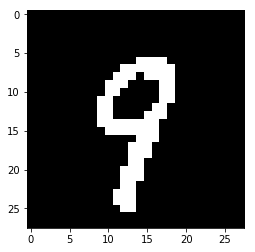

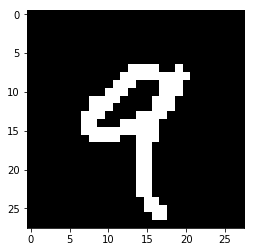

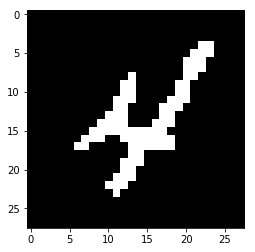

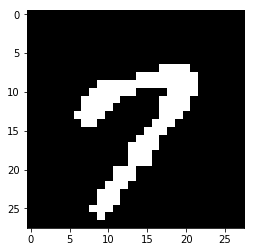

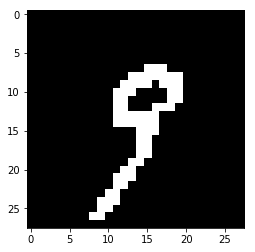

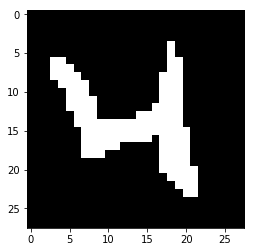

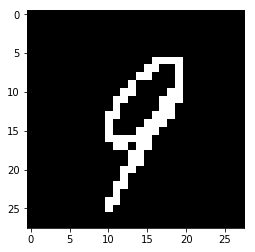

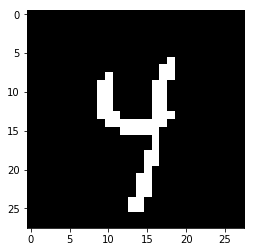

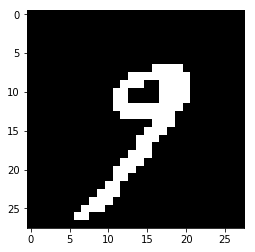

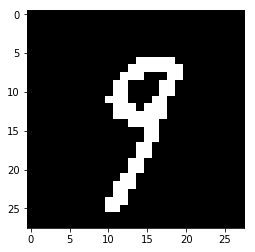

Image des medoids obtenue par la distance euclidienne entre le donnés


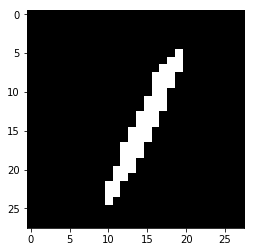

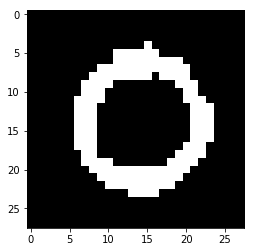

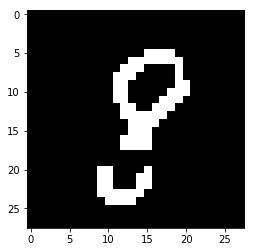

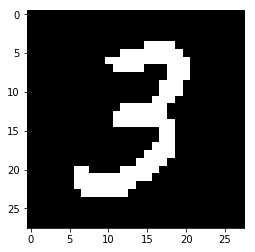

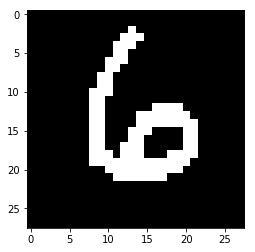

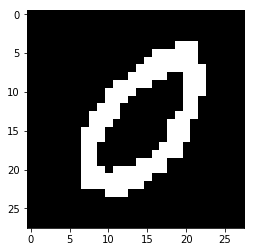

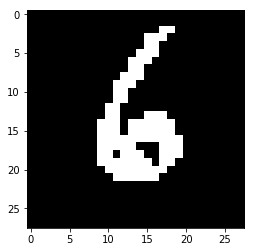

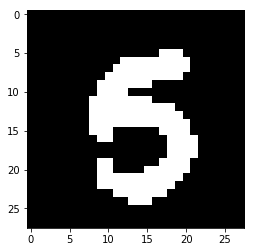

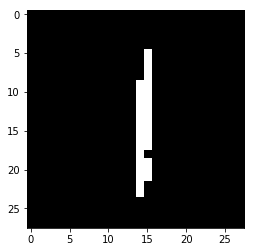

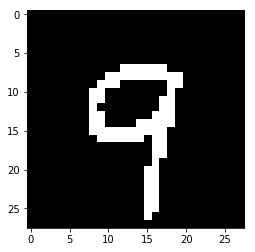

In [30]:
n_data = 4000 # nombre de données pour faire le teste

#on retire les labels au donné pour seulement garder les composantes
mnist_train_mod = traitement_centro(14,6000)

mnist_mod_data = mnist_train_mod[:n_data, 1:]
mnist_data = mnist_train[:n_data, 1:]

# matrice de distance enre les donné transformer
start = time.time()
d_mod = metrics.pairwise_distances(mnist_mod_data, mnist_mod_data)
end = time.time()
print("Temps d'éxécution de l'algorithme k-medoid pour le cas de centroid: " + str(end - start))

#matrice de distance euclidienne
start = time.time()
d_euc = metrics.pairwise.euclidean_distances(mnist_data, mnist_data)
end = time.time()
print("Temps d'éxécution de l'algorithme k-medoid pour le cas Euclidien: " + str(end - start))


np.random.seed(2555)

# initialize les medoids
initial_medoids = np.zeros((10), dtype="int32")
for i in range(10):
    n = np.random.randint(n_data)
    while n in initial_medoids:
        n = np.random.randint(n_data)
        
    initial_medoids[i] = n

print("Medoid intitaux: " + str(initial_medoids))



#cas donné transformer



k_mod = kmedoids(d_mod, initial_medoids, data_type='distance_matrix')


k_mod.process()


medoids = k_mod.get_clusters()[0]


print("Image des medoids obtenus par les donné des distance des centroid dans la base original")
for cent in mnist_data[medoids[:10]] :    
    plt.figure()
    printImage(cent)

plt.show()
# cas eucliden
k_euc = kmedoids(d_euc, initial_medoids, data_type='distance_matrix')


k_euc.process()


medoids = k_euc.get_medoids()


print("Image des medoids obtenue par la distance euclidienne entre le donnés")
for cent in mnist_data[medoids[:10]] :
    plt.figure()
    printImage(cent)

plt.show()
    

In [31]:
#for i in range(len(mnist_train_mod[:, 0])):
    #print(mnist_train_mod[:, 0][i])
#for i in range(len(mnist_train_mod[:, 0])):
    #print (mnist_train_mod[i, 0])

On observe que dans les deux cas, les médoïdes obtenus

#### Evaluation

On compare les scores silouhette de K-médoïde pour les deux distances.

In [32]:
""" Fonction qui transforme les données séparées en cluster 
    pour obtenir la liste des cluster associé a chaque donnée """

def prediction(clusters, datasize):
    predict = np.zeros((datasize), dtype="int32")
    for i in range(len(clusters)):
        predict[clusters[i]] = i
    return predict

predictions_mod = prediction(k_mod.get_clusters(), mnist_mod_data.shape[0])
#print(predictions_fft)
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_mod_data, predictions_mod)))

predictions_euc = prediction(k_euc.get_clusters(), mnist_data.shape[0])
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_data, predictions_euc)))

Score silhouette de la distance centroïde : 0.05424318369690576
Score silhouette de la distance centroïde : 0.0428137093265137


### Partition binaire
Maintenant on évalue les deux distance pour l'algorithme de partition binaire. On évalue aussi le score silouhette. 

In [33]:
#cas donné transformer
clustering_mod = AgglomerativeClustering(n_clusters=10, linkage="average").fit(mnist_mod_data)


# cas normal
clustering_euc = AgglomerativeClustering(n_clusters=10, linkage="average").fit(mnist_data)

#prediction
predictions_mod = clustering_mod.labels_
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_mod_data, predictions_mod)))


predictions_euc = clustering_euc.labels_
print("Score silhouette de la distance centroïde : " + str(metrics.silhouette_score(mnist_data, predictions_euc)))

centers = np.zeros((28))

Score silhouette de la distance centroïde : 0.04899859209945686
Score silhouette de la distance centroïde : 0.04992089782923688


Les regroupement semble beaucoup mieux définit avec la nouvelle distance si on se fie au score silouhette. La distance semble donc mieux fonctionner avec le partitionnement binaire qu'avec k-médoïde.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

mnist_train1 = mnist_train_mod[:2000]
mnist_test1 = mnist_test_mod[:1000]
mnist_train2 = mnist_train[:2000]
mnist_test2 = mnist_test[:1000]
#in_euc = lambda x, y : -(np.sqrt(np.sum((x - y)**2)))
knn_fft = KNeighborsClassifier(4).fit(mnist_train1[:, 1:], mnist_train1[:, 0])
print(knn_fft.score(mnist_test1[:, 1:], mnist_test1[:, 0]))
knn_euc = KNeighborsClassifier(6).fit(mnist_train2[:, 1:], mnist_train2[:, 0])
print(knn_euc.score(mnist_test2[:, 1:], mnist_test2[:, 0]))

NameError: name 'mnist_test_mod' is not defined

## PCOA (MDS)

PcoA est une variance de MDs, alors nous avons préféré utiliser MDS. À première, quand on applique cet algorithme sur 2500 éléments du jeu de donnée MNIST avec une désimilarité euclédienne , le résultat obtenu est le suivant :

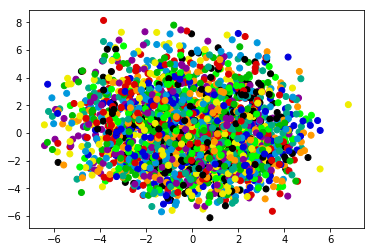

In [35]:
from sklearn.manifold import MDS

clf = MDS(n_components=12, n_init=1, max_iter=100, dissimilarity='euclidean', random_state=1)
X_mds = clf.fit_transform(mnist_train[:, 1:][:2500,:].astype(np.float64))

colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors)
 

Et si on applique le même algorithme sur les données de notre algorithme, les résultats sont :

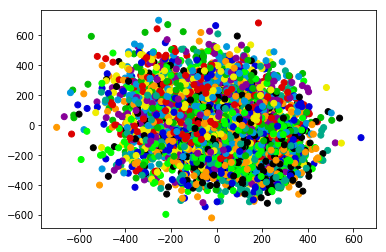

In [36]:
from sklearn.manifold import MDS

clf = MDS(n_components=12, n_init=1, max_iter=100, dissimilarity='euclidean', random_state=1)
X_mds = clf.fit_transform(mnist_train_mod[2500:,:])

colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

plt.scatter(X_mds[:, 0], X_mds[:, 1], c=colors)
 

Dans le jeu de donnée original, on remarque nos points ce regroupe au centre et il y a peu qui s’éloigne du groupe. Dans notre algorithme les points se regroupe aussi au centre mais occupe tout le plan et il y a beaucoup qui s’éloigne du groupe par rapport au jeu original. 

## Isomap

La première étape avec Isomap était de trouver les bons hyperparamètres : le nombre de voisins et de nombre de components. Pour le premier, si on regarde notre type de données, on se rend compte que les chiffres écrits à la main sont formés de traits continus (i.e. il y a toujours une seule composante connexe). Ainsi, il peut être intéressant d’augmenter le nombre de voisins requis pour les bons, puisqu’on est certain qu’il n’y aura pas de bruit autout des chiffres. 

Ensuite, pour le nombre de components, nous nous sommes basés sur cet article proposant de regarder le ration de variance expliqué pour PCA. En regardant la courbe des variances, on observe qu’avec 80 composantes, on peut avoir 80% de la variance, mais qu’il faudra près de 150 composantes pour avoir environ 95% de la variance. Toutefois, si on essaie de calculer l’erreur de reconstruction pour nb_composantes >= 53, on obtient une erreur avec la librairie, car les valeurs propres sont négatives. Après lecture de plusieurs articles, dont un portant sur l’optimisation des paramètres d’ISOMAP, on remarque que pour MNIST, les résultats optimaux obtenus sont de nombre_voisins = 9.6 et nombre_components = 6 ou 7 pour un erreur d’environ 1.5%. 

Si l’on augmente considérablement le nombre de voisins (99 pour un max de 100) et qu’on augmente aussi le nombre de components (disons 25), on réduit fortement l’erreur de reconstruction (50 à environ 2). Mais on peut imaginer que celui est causé par du overfitting excessif de nos données.
Nous pensons avoir eu ces résultats, car ....


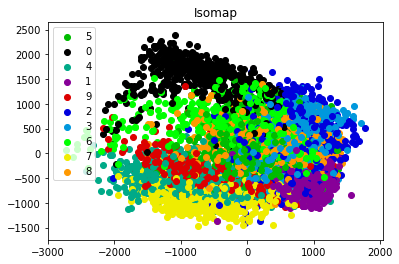

In [10]:

mnist_train_mod = traitement_centro(12,6000)
isomap = Isomap(n_neighbors=8, n_components=2)
X_iso = isomap.fit(mnist_train_mod).transform(mnist_train_mod)
colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

target_names2 = [0,1,2,3,4,5,6,7,8,9]
bool_label = [False,False,False,False,False,False,False,False,False,False]
#print(y_train)
#print (target_names2)
#print (X_iso)
#print (colors)
## plot
plt.figure()
for i in range(len(mnist_train_mod[:, 0])):
    for targ in target_names2: 
        if (mnist_train_mod[i, 0] == targ):
            if (not(bool_label[targ])):
                plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
                bool_label[targ] = True
            else: 
                plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
plt.legend()
plt.title('Isomap')
plt.show()

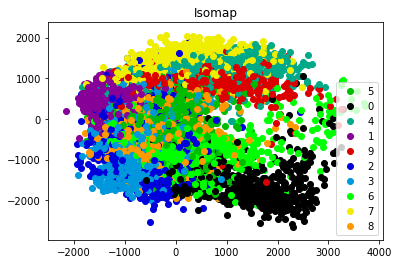

In [20]:
def makeiso(mnist_train_mod, n_neighbors=8, n_components=2):
    isomap = Isomap(n_neighbors, n_components)
    X_iso = isomap.fit(mnist_train_mod).transform(mnist_train_mod)
    colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

    target_names2 = [0,1,2,3,4,5,6,7,8,9]
    bool_label = [False,False,False,False,False,False,False,False,False,False]
    #print(y_train)
    #print (target_names2)
    #print (X_iso)
    #print (colors)
    ## plot
    plt.figure()
    for i in range(len(mnist_train_mod[:, 0])):
        for targ in target_names2: 
            if (mnist_train_mod[i, 0] == targ):
                if (not(bool_label[targ])):
                    plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
                    bool_label[targ] = True
                else: 
                    plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
    plt.legend()
    plt.title('Isomap')
    plt.show()
    
mnist_train_mod = traitement_centro(14,6000)
makeiso(mnist_train_mod)

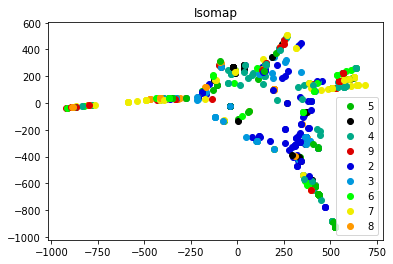

In [53]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
isomap = Isomap(n_neighbors=8, n_components=2)
X_iso = isomap.fit(mnist_train_mod).transform(mnist_train_mod)
colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

target_names2 = [0,2,3,4,5,6,7,8,9]
bool_label = [False,False,False,False,False,False,False,False,False,False]
#print(y_train)
#print (target_names2)
#print (X_iso)
#print (colors)
## plot
plt.figure()
#for i in range(len(mnist_train_mod[:, 0])):
for i in range(1000):
    for targ in target_names2: 
        if (mnist_train_mod[i, 0] == targ):
            if (not(bool_label[targ])):
                plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
                bool_label[targ] = True
            else: 
                plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
plt.legend()
plt.title('Isomap')
plt.show()

KeyboardInterrupt: 

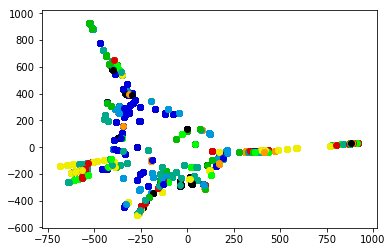

In [57]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
isomap = Isomap(n_neighbors=8, n_components=2)
X_iso = isomap.fit(mnist_train_mod).transform(mnist_train_mod)
colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

target_names2 = [0,2,3,4,5,6,7,8,9]
bool_label = [False,False,False,False,False,False,False,False,False,False]
#print(y_train)
#print (target_names2)
#print (X_iso)
#print (colors)
## plot
plt.figure()
for i in range(len(mnist_train_mod[:, 0])):
    for i in range(1000):
        for targ in target_names2: 
            if (mnist_train_mod[i, 0] == targ):
                if (not(bool_label[targ])):
                    plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
                    bool_label[targ] = True
                else: 
                    plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
plt.legend()
plt.title('Isomap')
plt.show()

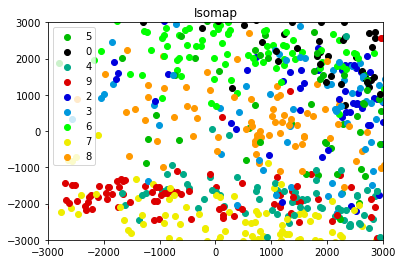

6050180.633740105


In [27]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
isomap = Isomap(n_neighbors=8, n_components=2)
X_iso = isomap.fit(mnist_train_mod).transform(mnist_train_mod)
colors = [plt.cm.nipy_spectral(i/10., 1) for i in range(10)]

target_names2 = [0,2,3,4,5,6,7,8,9]
bool_label = [False,False,False,False,False,False,False,False,False,False]
#print(y_train)
#print (target_names2)
#print (X_iso)
#print (colors)
## plot
plt.figure()
#for i in range(len(mnist_train_mod[:, 0])):
for i in range(1000):
   for targ in target_names2: 
       if (mnist_train_mod[i, 0] == targ):
           if (not(bool_label[targ])):
               plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ], label = targ)
               bool_label[targ] = True
           else: 
               plt.scatter(X_iso[i, 0], X_iso[i, 1], c=colors[targ])
plt.legend()
plt.title('Isomap')
plt.axis([-3000, 3000, -3000, 3000])
plt.show()
print(isomap.reconstruction_error())

## KNN

In [8]:
# KNN simplifie avec sklearn
from sklearn.neighbors import KNeighborsClassifier

mnist_train_mod = traitement_centro(12,6000)

#Groupe 1 teste les données de MNIST préalablement traitées
mnist_train1 = mnist_train_mod[:2000]
mnist_test1 = mnist_test_mod[:1000]

#Groupe 2 teste les données de MNIST sans traitement 
mnist_train2 = mnist_train[:2000]
mnist_test2 = mnist_test[:1000]

neigh = KNeighborsClassifier(n_neighbors=3)

#Résultats:
knn_notion_sim_originale = neigh.fit(mnist_train1[:, 1:], mnist_train1[:, 0])
print(knn_notion_sim_originale.score(mnist_test1[:, 1:], mnist_test1[:, 0]))

knn_ordinaire = neigh.fit(mnist_train2[:, 1:], mnist_train2[:, 0])
print(knn_ordinaire.score(mnist_test2[:, 1:], mnist_test2[:, 0]))

NameError: name 'traitement_centro' is not defined

## Forces et faiblesses

## Analyse de l’algorithme de KNN : 
Pour l’analyse de cette partie, nous avons simplement utilisé la librairie ‘KNeighborsClassifier’ disponible via sklearn afin de faciliter l’utilisation de l’algorithme KNN. Dans un premier temps, nous avons créé deux groupes, le premier contient les données de MNIST préalablement traitées par la méthode du centroïde (discuté plus haut dans l’explication de notre notion de similarité originale) et le deuxième contient les données tirées de MNIST sans traitement particulier. Ensuite, nous avons calculé le taux de succès dans les deux cas. Ce taux fait une prédiction sur le résultat des données de test et le compare avec la vraie valeur indiquée par le label. Il est à préciser que nous avons utilisé nb_sub=12, c’est-à-dire que nous séparons les images originales en 12 sous-images à chaque fois (voir la partie explication sur notre notion de similarité).


Il est permis de voir que la difficulté ici est de choisir le nombre k de voisins approprié afin d’avoir un meilleur taux de succès. Or, il est possible de voir que malgré la variation du nombre k de voisins, le taux de succès en utilisant la distance euclidienne standard est plus élevé que en utilisant notre notion de similarité. 


## Sitographie

### Consultation
- KNN : https://steven.codes/blog/ml/how-to-get-97-percent-on-MNIST-with-KNN/
- Distance Cosinus : https://towardsdatascience.com/building-improving-a-k-nearest-neighbors-algorithm-in-python-3b6b5320d2f8
- Distance tangente : http://yann.lecun.com/exdb/publis/pdf/simard-00.pdf
- Distance tangente : http://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-atelier-MINST-tangent-ditance.pdf
- Distance tangente : https://pdfs.semanticscholar.org/05c1/bee0b066351e40b096f569e2c06c98c2db38.pdf
- PCOA : http://colah.github.io/posts/2014-10-Visualizing-MNIST/
- ISOMAP : https://www.aaai.org/Papers/AAAI/2002/AAAI02-035.pdf
- Descente de gradient : https://www.hindawi.com/journals/isrn/2012/834127/
- Descente de gradient : https://www.oreilly.com/learning/not-another-mnist-tutorial-with-tensorflow
- Cross validation : https://arxiv.org/pdf/1809.06846.pdf
- Pseudo metric : https://github.com/tensorpack/tensorpack/tree/master/examples/SimilarityLearning
- Normalisation : https://medium.com/@o.kroeger/tensorflow-mnist-and-your-own-handwritten-digits-4d1cd32bbab4
        
### Utilisation
- DB Mnist : http://yann.lecun.com/exdb/mnist/
- Apprentissage de notion de similarité : http://jmlr.csail.mit.edu/papers/volume10/weinberger09a/weinberger09a.pdf
- Concepts variés : http://individual.utoronto.ca/gauravjain/ECE462-HandwritingRecognition.pdf
- Idées pour extraction de features : https://pdfs.semanticscholar.org/d93f/5078717c38904aa24590079e4fa06a5d1639.pdf